In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.utils import resample 

In [7]:
file_path=r"Desktop/cancer/archive.zip"
df=pd.read_csv(file_path, encoding='ISO-8859-1')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [8]:
df.shape

(1143, 13)

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [10]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [11]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [14]:
df=df.dropna()

In [15]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [16]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df=df.drop_duplicates()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595



Quality value counts:
quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64


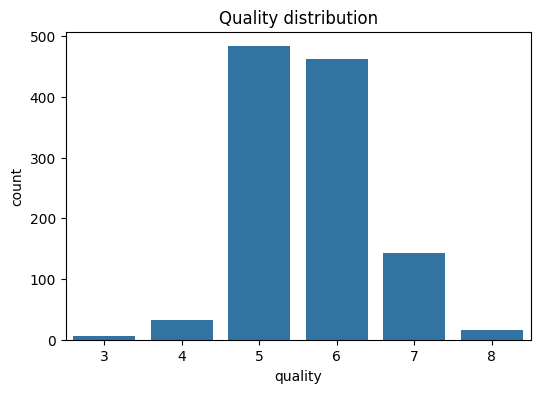

In [54]:
print('\nQuality value counts:')
print(df['quality'].value_counts().sort_index())

plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=df)
plt.title('Quality distribution')
plt.show()

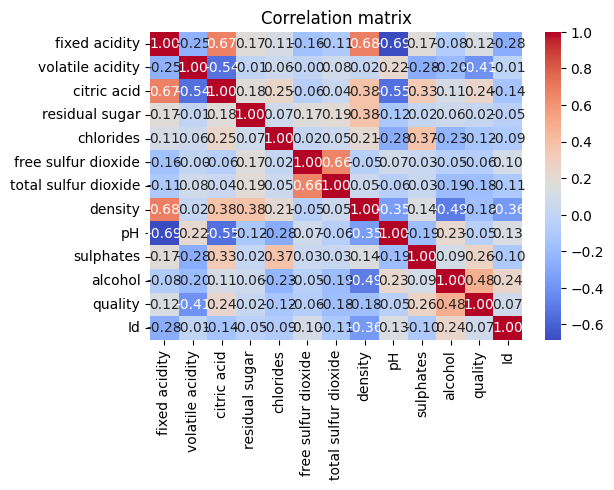

In [28]:
#heatmap
plt.figure(figsize=(6,4))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [31]:
#features and labels
X = df.drop('quality', axis=1)
y_multiclass = df['quality']

y_binary = (df['quality'] >= 7).astype(int)

print('\nBinary label distribution (0=bad,1=good):')
print(y_binary.value_counts())



Binary label distribution (0=bad,1=good):
quality
0    984
1    159
Name: count, dtype: int64


In [33]:
#Train/test split 
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, stratify=y_binary, random_state=42)
print('\nTrain/test sizes (binary):', X_train.shape, X_test.shape)


Train/test sizes (binary): (914, 12) (229, 12)


In [45]:
train_df = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
major = train_df[train_df['quality']==0]
minor = train_df[train_df['quality']==1]
print('\nTraining class counts before resample:')
print(train_df['quality'].value_counts())

if len(minor) == 0:
    print('No positive examples in training set; skipping resampling.')
else:
    # Upsample minority class
    minor_upsampled = resample(minor, replace=True, n_samples=len(major), random_state=RANDOM_STATE)
    train_bal = pd.concat([major, minor_upsampled]).sample(frac=1, random_state=RANDOM_STATE)
    X_train_bal = train_bal.drop('quality', axis=1)
    y_train_bal = train_bal['quality']
    print('\nTraining class counts after upsample:')
    print(y_train_bal.value_counts())



Training class counts before resample:
quality
0.0    787
1.0    127
Name: count, dtype: int64

Training class counts after upsample:
quality
1.0    787
0.0    787
Name: count, dtype: int64



Training rf ...
Best params for rf: {'rf__max_depth': None, 'rf__n_estimators': 100}
Test accuracy (rf): 0.8515
Classification report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       197
           1       0.33      0.06      0.11        32

    accuracy                           0.85       229
   macro avg       0.60      0.52      0.51       229
weighted avg       0.79      0.85      0.81       229



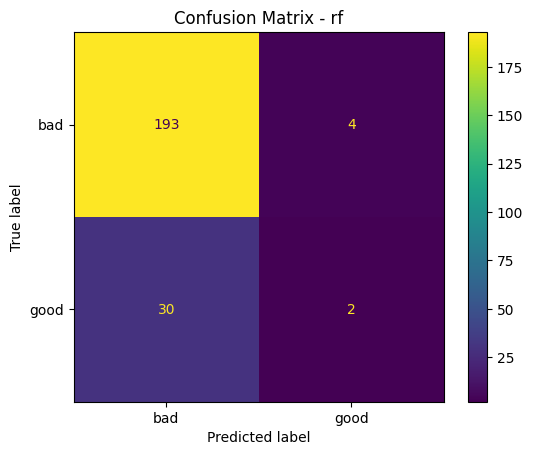


Training sgd ...


C:\Users\praveen\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\praveen\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\praveen\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\praveen

Best params for sgd: {'sgd__alpha': 0.001, 'sgd__loss': 'hinge'}
Test accuracy (sgd): 0.5502
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.55      0.68       197
           1       0.17      0.56      0.26        32

    accuracy                           0.55       229
   macro avg       0.53      0.56      0.47       229
weighted avg       0.79      0.55      0.62       229



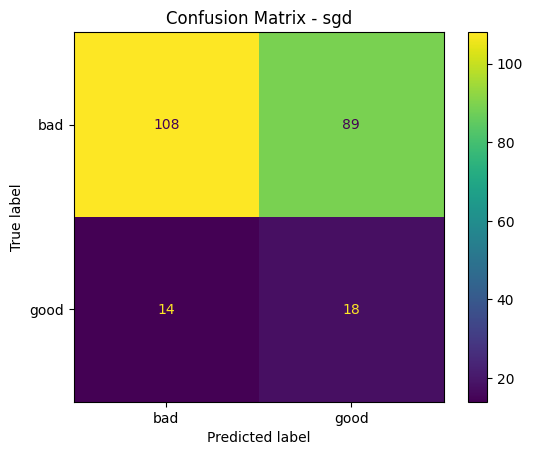


Training svc ...
Best params for svc: {'svc__C': 10, 'svc__kernel': 'rbf'}
Test accuracy (svc): 0.7598
Classification report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       197
           1       0.21      0.25      0.23        32

    accuracy                           0.76       229
   macro avg       0.54      0.55      0.54       229
weighted avg       0.78      0.76      0.77       229



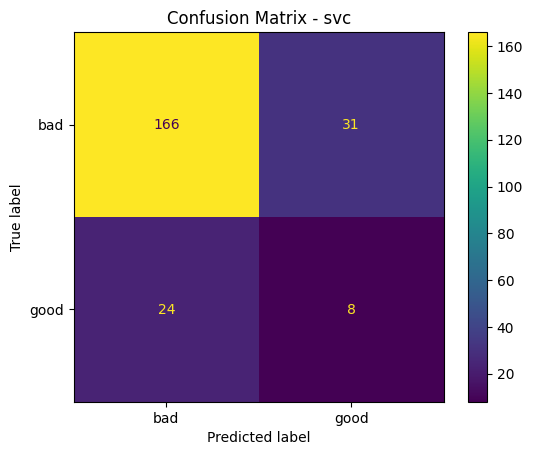

In [52]:
#pipelines
pipelines = {
    'rf': Pipeline([('rf', RandomForestClassifier(random_state=RANDOM_STATE))]),
    'sgd': Pipeline([('scaler', StandardScaler()), ('sgd', SGDClassifier(random_state=RANDOM_STATE, max_iter=5000, tol=1e-3))]),
    'svc': Pipeline([('scaler', StandardScaler()), ('svc', SVC(probability=True, random_state=RANDOM_STATE))])
}

# 8. Hyperparameter grids (kept small for speed)
param_grids = {
    'rf': {
        'rf__n_estimators': [100, 200],
        'rf__max_depth': [None, 10, 20]
    },
    'sgd': {
        'sgd__loss': ['log', 'hinge'],
        'sgd__alpha': [1e-4, 1e-3]
    },
    'svc': {
        'svc__C': [0.1, 1, 10],
        'svc__kernel': ['rbf', 'linear']
    }
}
from sklearn.impute import SimpleImputer

# Create an imputer to replace NaN values
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data
X_train_bal_imputed = imputer.fit_transform(X_train_bal)
X_test_imputed = imputer.transform(X_test)

# Define the pipelines with valid loss function
pipelines = {
    'rf': Pipeline([('rf', RandomForestClassifier(random_state=RANDOM_STATE))]),
    'sgd': Pipeline([('scaler', StandardScaler(),), ('sgd', SGDClassifier(loss='log_loss', random_state=RANDOM_STATE, max_iter=5000, tol=1e-3))]),
    'svc': Pipeline([('scaler', StandardScaler()), ('svc', SVC(probability=True, random_state=RANDOM_STATE))])
}

# Fit the models
best_models = {}
for name, pipe in pipelines.items():
    print(f"\nTraining {name} ...")
    grid = GridSearchCV(pipe, param_grids[name], cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE),scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_bal_imputed, y_train_bal)
    best_models[name] = grid.best_estimator_
    print(f"Best params for {name}: {grid.best_params_}")
    
    y_pred = grid.predict(X_test_imputed)
    acc = accuracy_score(y_test, y_pred)
    print(f"Test accuracy ({name}): {acc:.4f}")
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['bad', 'good']).plot()
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

In [53]:
import joblib
for name, model in best_models.items():
    fname = f"best_model_{name}.joblib"
    joblib.dump(model, fname)
    print('Saved', fname)

print('\nNotebook run complete. You can adjust thresholds, hyperparameter grids, or target definition to improve results.')

Saved best_model_rf.joblib
Saved best_model_sgd.joblib
Saved best_model_svc.joblib

Notebook run complete. You can adjust thresholds, hyperparameter grids, or target definition to improve results.
